# Custo de seguro médico nos EUA

**Obejtivo**

O objetivo deste projeto é analisar os fatores que influenciam os custos de seguro médico nos EUA, utilizando um dataset que contém informações sobre idade, sexo, índice de massa corporal (IMC), número de filhos, status de fumante e região geográfica dos indivíduos segurados. A análise buscará identificar padrões e relações entre essas variáveis e os custos do seguro.

**Perguntas a serem respondidas no projeto**
- Qual é a relação entre a idade e o custo do seguro médico ?
- Como o índice de massa corporal (BMI) influencia os custos de seguro médico ?
- Qual é o impacto do número de filhos no custo do seguro médico ?
- O status de fumante afeta significativamente os custos do seguro médico ?
- Quais regiões apresentam os custos de seguro mais altos e mais baixos ?
- O sexo do indivíduo tem influência sobre os custos do seguro médico ?
- Quais combinações de fatores (idade, BMI, número de filhos, status de fumante e região) estão mais associadas a altos 
custos de seguro ?

In [105]:
# Importacao de bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Exploração de dados

In [106]:
# Carregar o dataset e exibir
df = pd.read_csv("./seguro.csv")
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [107]:
# Informacoes do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


**Análise Descritiva**

In [108]:
# Estatisticas descritivas
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [109]:
# Valores das variaveis categoricas
print(f"""Values:
    sex={df["sex"].unique()}      
    smoker={df["smoker"].unique()} 
    region={df["region"].unique()}
""")

Values:
    sex=['female' 'male']      
    smoker=['yes' 'no'] 
    region=['southwest' 'southeast' 'northwest' 'northeast']



In [110]:
# Frequencia para cada variavel categorica
print(f"""Frequency: 
    {df['sex'].value_counts()}
    {df['smoker'].value_counts()}
    {df['region'].value_counts()}
""")

Frequency: 
    sex
male      676
female    662
Name: count, dtype: int64
    smoker
no     1064
yes     274
Name: count, dtype: int64
    region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64



**Vizualizações de distribuição**

In [111]:
%matplotlib inline
plt.rcParams["figure.dpi"] = (100)

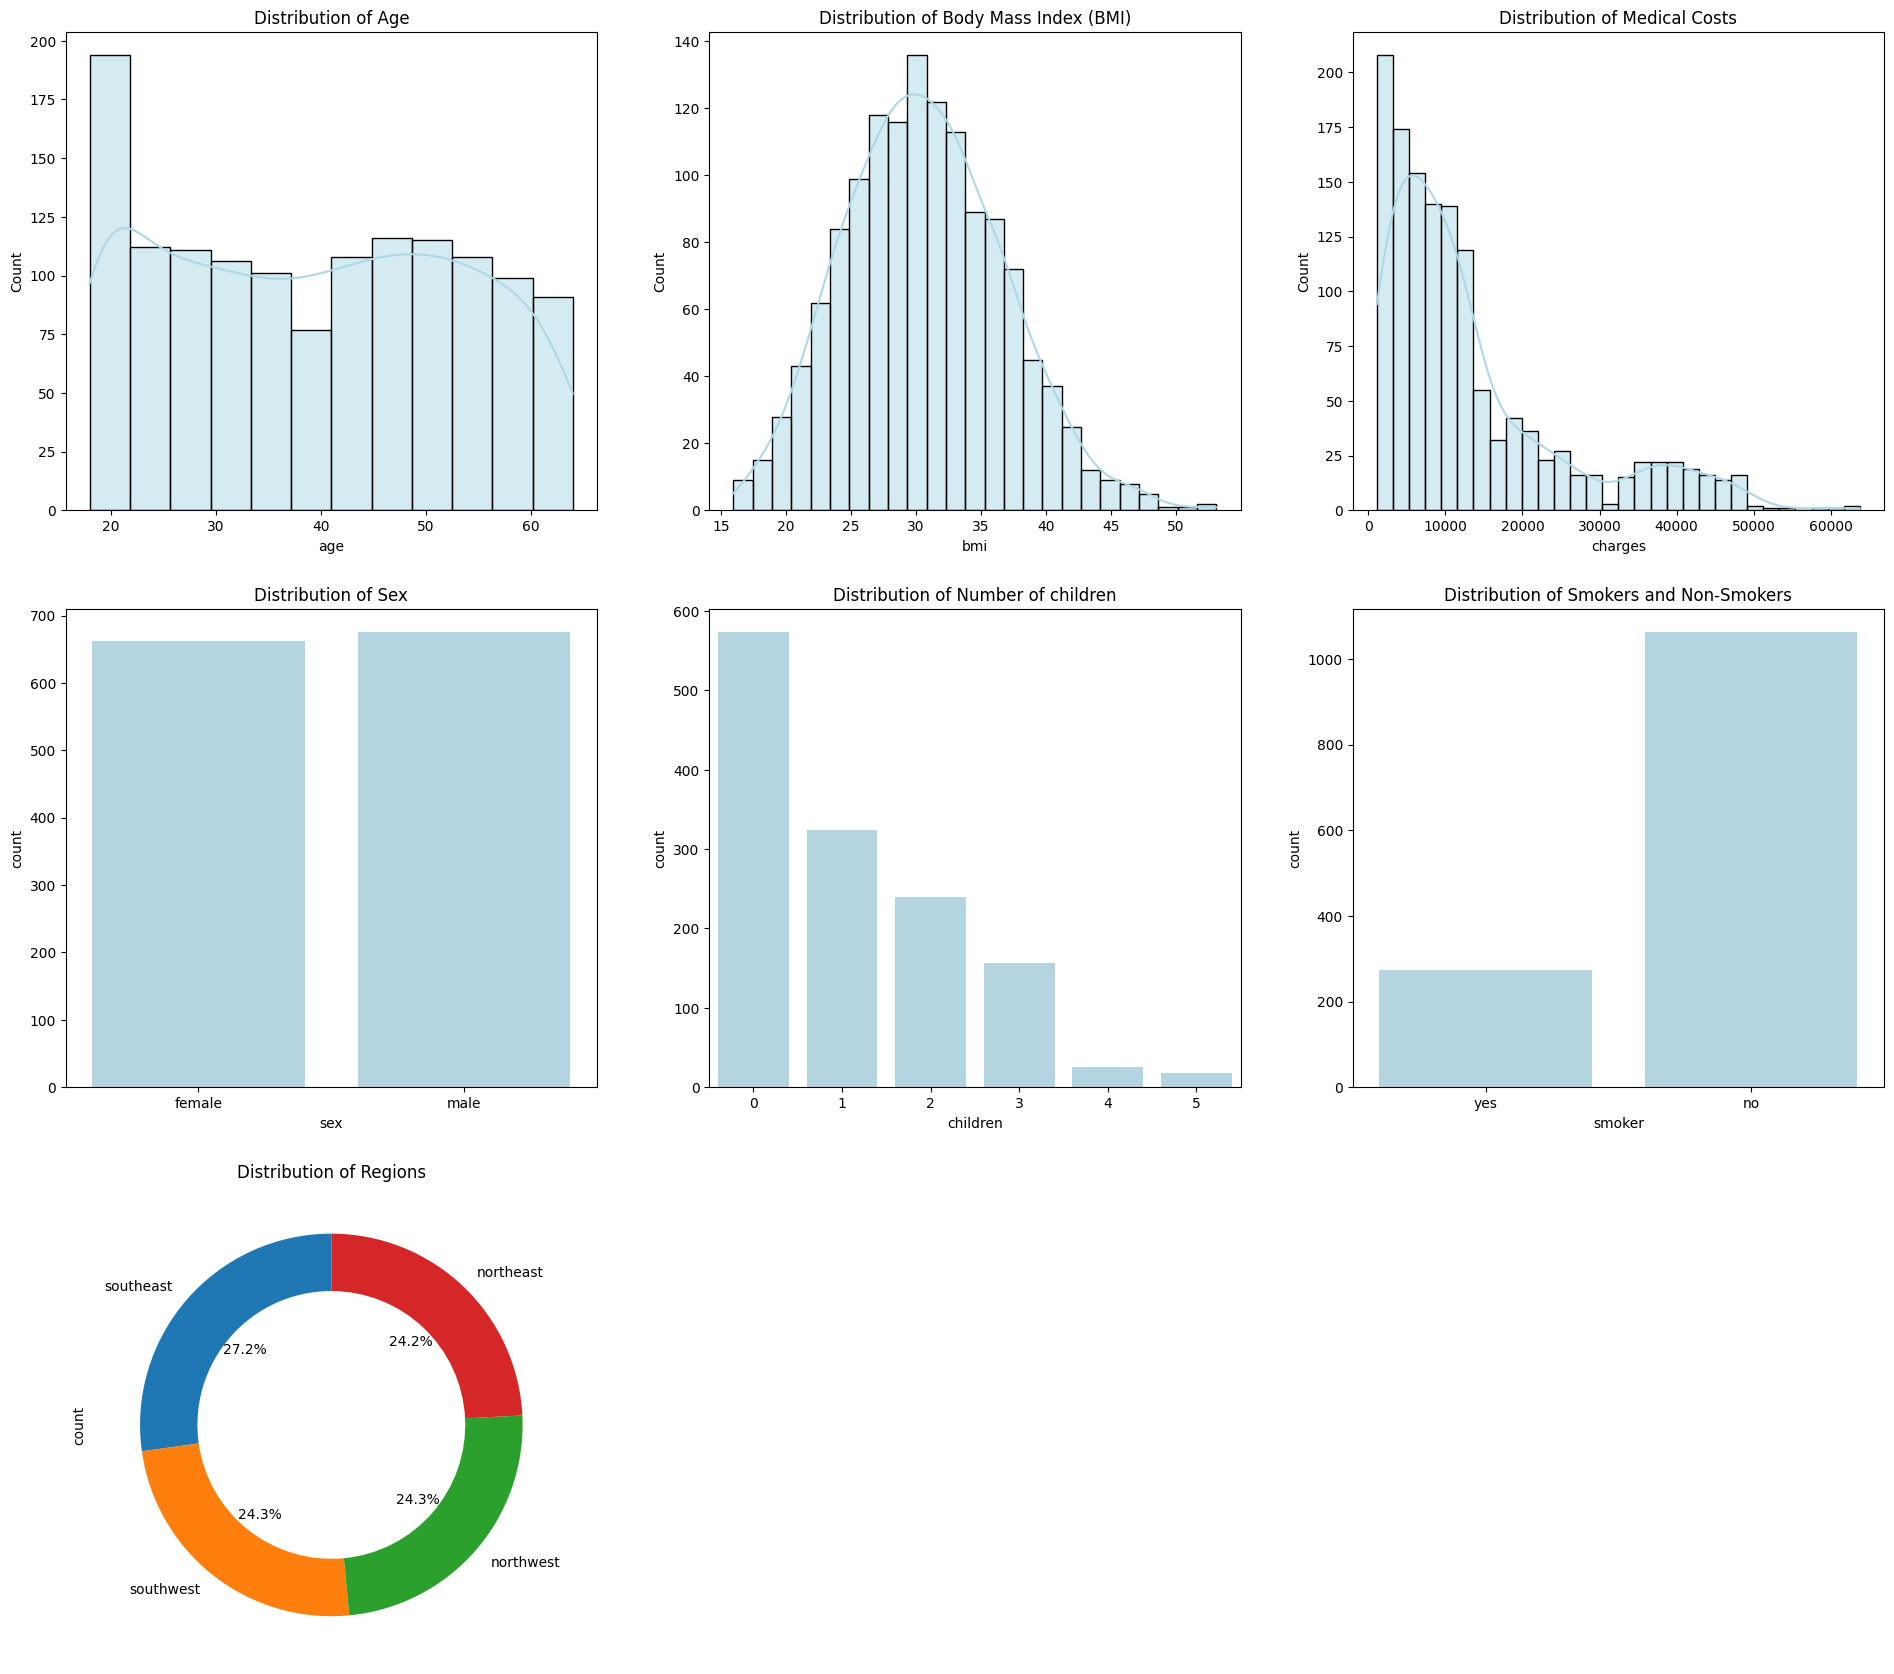

In [112]:
# Funções para vizualizacoes
def plot_hist(data, column, title, ax):
    sns.histplot(data=data[column], 
                 kde=True, 
                 color="lightblue",
                 ax=ax)
    ax.set_title(f"Distribution of {title}")

def plot_bar(data, column, title, ax):
    sns.countplot(data=data, 
                  x=column, 
                  color="lightblue",
                  ax=ax)
    ax.set_title(f"Distribution of {title}")

def plot_pie(data, column, title, ax):
    data[column].value_counts().plot.pie(autopct="%1.1f%%", 
                                         startangle=90, 
                                         wedgeprops=dict(width=0.3), 
                                         ax=ax)
    ax.set_title(f"Distribution of {title}")

# Cria janela com varios graficos
fig, graficos = plt.subplots(nrows=3, ncols=3, figsize=(20, 18))
plt.tight_layout(pad=5) # 'pad=5' -> espacamento entre os graficos 

# 1) Gráfico de histograma
plot_hist(df, "age", "Age", graficos[0][0])
plot_hist(df, "bmi", "Body Mass Index (BMI)", graficos[0][1])
plot_hist(df, "charges", "Medical Costs", graficos[0][2])

# 2) Gráfico de barra
plot_bar(df, "sex", "Sex", graficos[1][0])
plot_bar(df, "children", "Number of children", graficos[1][1])
plot_bar(df, "smoker", "Smokers and Non-Smokers", graficos[1][2])

# 3) Gráfico de pizza
plot_pie(df, "region", "Regions", graficos[2][0])

# Remove subplots vazios
for i in range(2, 3):
    for j in range(1, 3):
        fig.delaxes(graficos[i][j])
        
# Exibe graficos       
plt.show()


Com base nos gráficos acima, podemos observar:

- Distribuição de Idade (_Distribution of Age_): A distribuição de idade é relativamente uniforme entre 20 e 60 anos, 
com um pico em torno dos 20 anos e uma queda entre os 50 e 60 anos, além de outra queda entre 40 anos.

- Distribuição do Índice de Massa Corporal (_Distribution of Body Mass Index - BMI_): A maioria dos indivíduos tem um 
índice de massa corporal (BMI) entre 25 e 35, indicando que muitos estão com sobrepeso ou obesidade leve, com um pico em torno de 30.

- Distribuição dos Custos Médicos (_Distribution of Medical Costs_): Os custos médicos estão concentrados entre 5.000 e 
15.000 dólares, indicando que a maioria das pessoas tem custos médicos baixos, com poucas pessoas enfrentando custos mais elevados.

- Distribuição por Sexo (_Distribution of Sex_): Homens e mulheres estão distribuídos de forma quase igual, mostrando um
 bom balanceamento de gênero no conjunto de dados.

- Distribuição do Número de Filhos (_Distribution of Number of Children_): A maioria das famílias não tem filhos, com 
uma diminuição gradual na contagem à medida que o número de filhos aumenta, especialmente entre 1 e 3 filhos.

- Distribuição de Fumantes e Não Fumantes (_Distribution of Smokers and Non-Smokers_): A proporção de não fumantes é 
quase três vezes maior que a de fumantes, indicando que a maioria das pessoas não fuma.

- Distribuição das Regiões (_Distribution of Regions_): A distribuição é bem equilibrada entre as regiões, com uma 
pequena diferença na região Sudeste (_Southeast_) em comparação com as outras.

**Correlação das variaveis numéricas**

               age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000


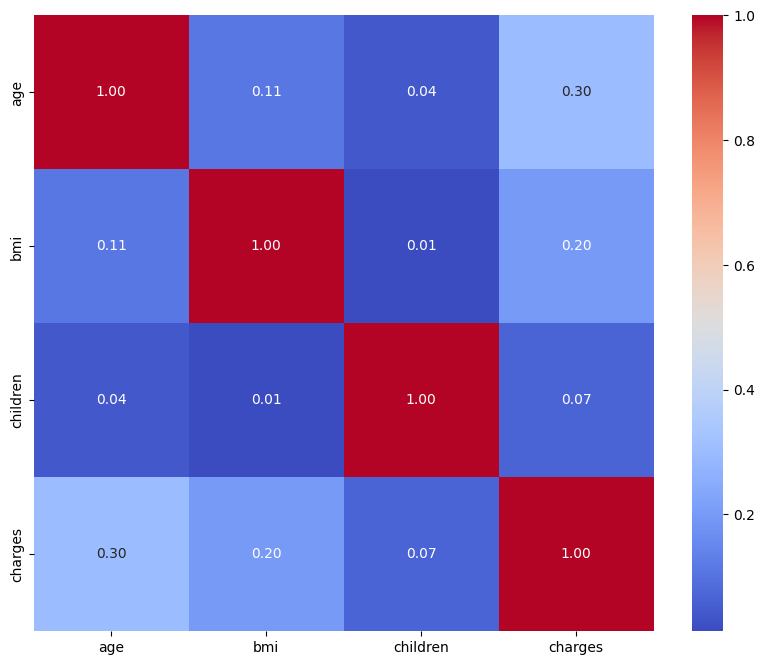

In [113]:
# Definindo as variaveis e exibindo valores 
corr_df = df[["age", "bmi", "children", "charges"]].corr()
print(corr_df)

# Vizualizar matriz de correlacao
plt.figure(figsize=(10, 8))
sns.heatmap(corr_df, 
            annot=True, 
            cmap="coolwarm", 
            fmt=".2f")
plt.show()

Conforme a matriz de correlação, podemos observar as seguintes correlações importantes:

- A idade apresenta uma correlação positiva moderada com os custos médicos, indicando que, conforme as pessoas envelhecem, os custos médicos tendem a aumentar.
- O índice de massa corporal (_BMI_) apresenta uma correlação positiva fraca com os custos médicos, sugerindo que indivíduos com _BMI_ mais altos tendem a ter custos médicos ligeiramente maiores.
- O número de filhos apresenta uma correlação positiva muito fraca com todas as outras variáveis, indicando pouca relação causal com as demais variáveis.

Para visualizar as relações entre as variáveis conforme foi descrito acima, podemos utilizar os seguintes gráficos que serao exibidos a seguir:
- Relação entre a idade e o custo do seguro médico (Gráfico de dispersao)
- Relação entre o índice de massa corporal (BMI) e o custo do seguro médico (Gráfico de dispersao)
- Relação entre o número de filhos e o custo do seguro médico (Gráfico de barras)

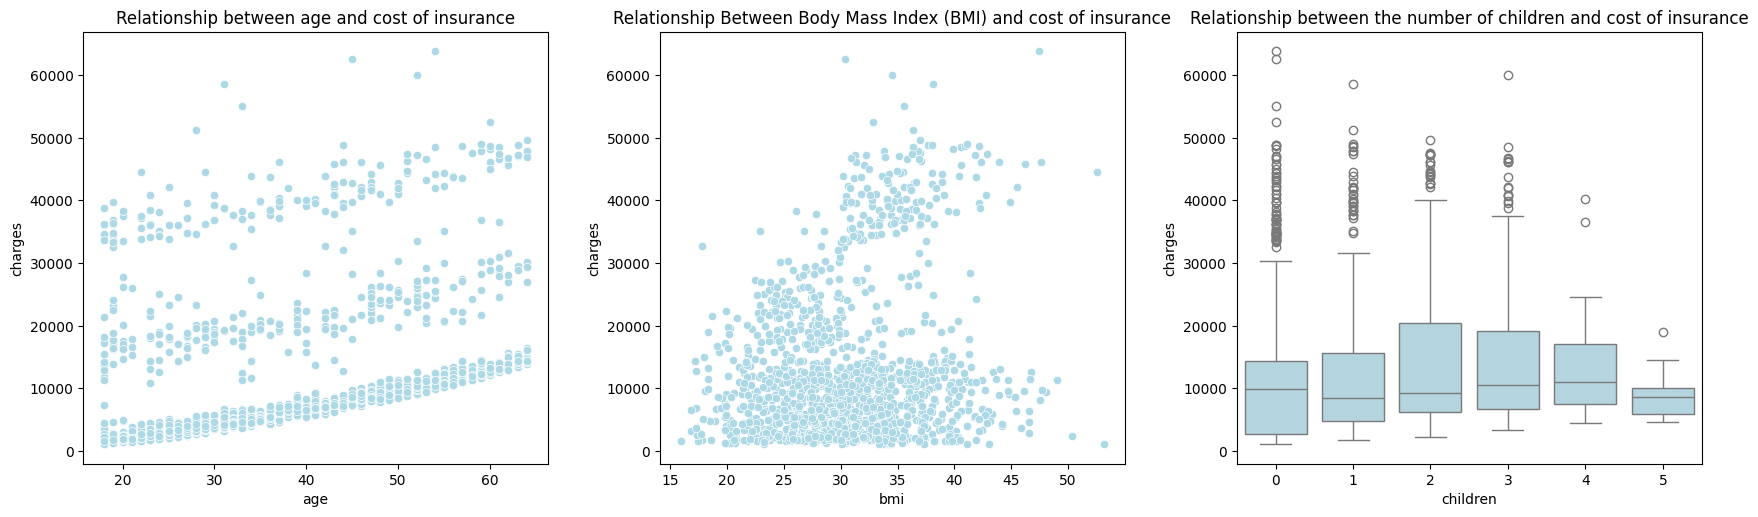

In [114]:
# Funcao para plotar os graficos 
def plot_relation(data, x, y, title, kind, ax):
    if kind == "box":
        sns.boxplot(data=data,
                    x=x, 
                    y=y,
                    color="lightblue",
                    ax=ax)
    elif kind == "scatter":
        sns.scatterplot(data=df, 
                        x=x, 
                        y=y,
                        color="lightblue",
                        ax=ax)
    ax.set_title(title)

# Cria janela com varios graficos
fig, graficos = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
plt.tight_layout(pad=5) # 'pad=5' -> espacamento entre os graficos 

# Graficos
plot_relation(df, "age", "charges", "Relationship between age and cost of insurance", "scatter",  graficos[0])
plot_relation(df, "bmi", "charges", "Relationship Between Body Mass Index (BMI) and cost of insurance", "scatter", graficos[1])
plot_relation(df, "children", "charges", "Relationship between the number of children and cost of insurance", "box", graficos[2])

# Exibir os graficos
plt.show()

### + análises

Neste tópico, serão apresentados quatro gráficos com as seguintes análises:
- Fumantes ou não fumantes em relação aos custos do seguro médico (Gráfico de barras)
- Regiões em relação aos custos do seguro médico (Gráfico de violino)
- Sexos em relação aos custos do seguro médico (Gráfico de violino)
- Relação entre o idade e os custos do seguro médico, diferenciados por status de fumante e região (Gráfico de dispersão)

**Fumantes ou não fumantes em relação aos custos do seguro médico**

Conforme o gráfico abaixo, observa-se que os custos do seguro médico são mais altos para fumantes em comparação com não 
fumantes. Isso pode ser devido aos danos causados pelo tabaco, que resultam em uma necessidade maior de consultas e 
exames médicos mais caros.

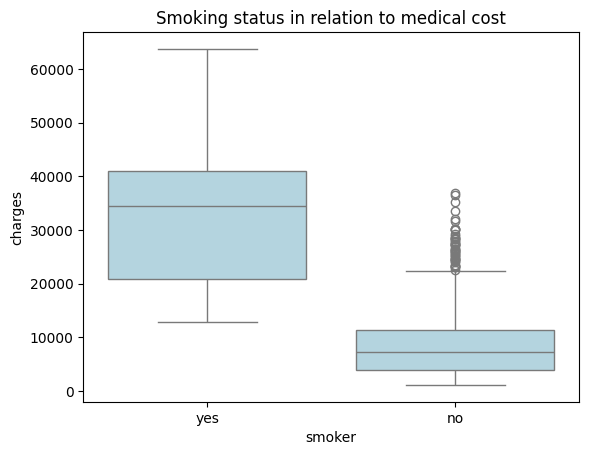

In [115]:
# Grafico de fumante ou nao, em relação ao custos do seguro medico
g = sns.boxplot(data=df,
                x="smoker",
                y="charges",
                color="lightblue")
g.set_title("Smoking status in relation to medical cost")
plt.show()

**Regiões em relação aos custos do seguro médico**

Conforme o gráfico abaixo, observa-se que todas as regiões apresentam uma distribuição assimétrica dos custos de seguros médicos. 
A maioria dos valores está concentrada na faixa de 0 a 15.000 dólares, com poucos valores dispersos até o limite de 70.000 dólares. 

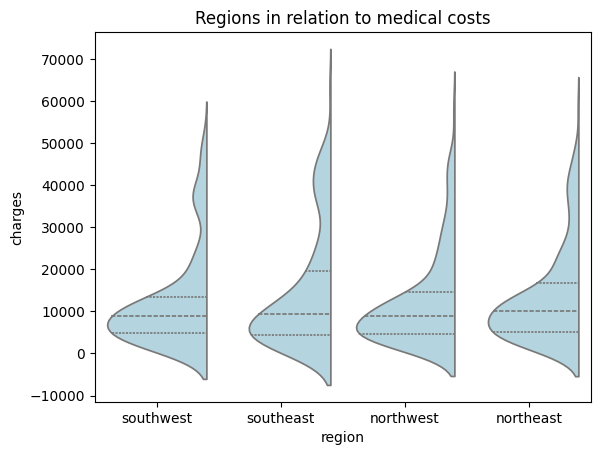

In [116]:
# Grafico de regioes em relação aos custos
g = sns.violinplot(data=df,
                   x="region",
                   y="charges",
                   split=True,
                   inner="quart",
                   color="lightblue")
g.set_title("Regions in relation to medical costs")
plt.show()

**Sexos em relação aos custos do seguro médico**

O gráfico abaixo mostra que a distribuição dos sexos está concentrada na faixa de 0 a 20.000 dólares. Além disso, observa-se que os homens tendem a ter gastos médicos mais elevados do que as mulheres, o que pode indicar a presença de fatores específicos, como comportamentos de risco ou problemas de saúde mais graves, que levam a maiores despesas médicas.

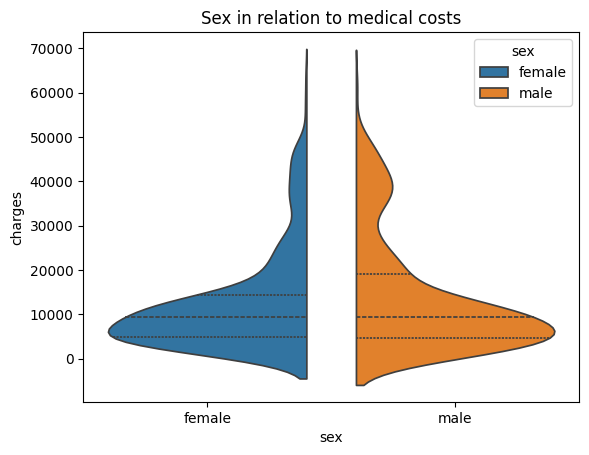

In [117]:
# Grafico sexos em relação ao custo do seguro medico
g = sns.violinplot(data=df,
                  x="sex",
                  y="charges",
                  hue="sex",
                  palette="tab10",
                  legend="full",
                  split=True,
                  inner="quart")
g.set_title("Sex in relation to medical costs")
plt.show()

**Relação entre o idade e os custos do seguro médico, diferenciados por status de fumante e região**

De acordo com o gráfico abaixo, os custos de seguro médico mostram uma tendência crescente com a idade e o status de fumante em todas as regiões. Observa-se que, para pessoas fumantes, os custos são mais altos (variando de 10.000 a 60.000) comparados aos não fumantes (variando de 0 a 15.000). Portanto, o status de fumante é o fator mais significativo que afeta os custos de seguro médico, independentemente de outras variáveis.


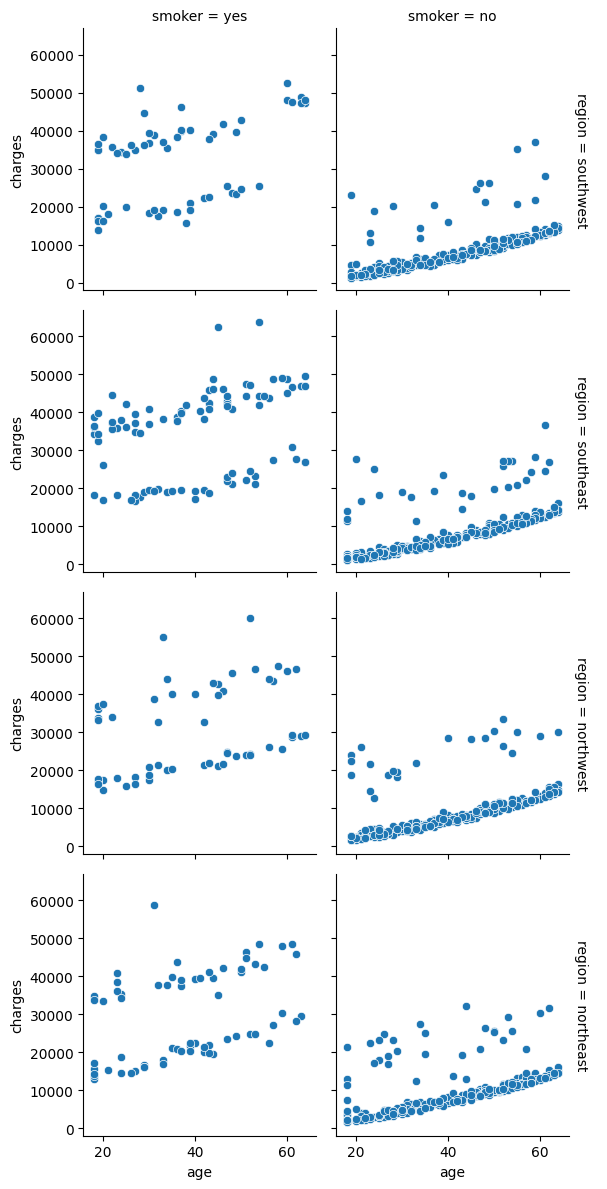

In [118]:
# Gráfico relação entre BMI e Custos de Seguro por Status de Fumante e Região
g = sns.FacetGrid(data=df, 
                  col="smoker", 
                  row="region", 
                  margin_titles=True, 
                  height=3)
g.map(sns.scatterplot, "age", "charges")
g.add_legend()
plt.show()

### Conclusão

**Respostas ás perguntas**
- Qual é a relação entre a idade e o custo do seguro médico ?
    - A idade apresenta uma correlação positiva moderada com os custos médicos, indicando que, conforme as pessoas envelhecem, 
    os custos médicos tendem a aumentar.
- Como o índice de massa corporal (BMI) influencia os custos de seguro médico ?
    - O índice de massa corporal (_BMI_) apresenta uma correlação positiva fraca com os custos médicos, sugerindo que 
    indivíduos com _BMI_ mais altos tendem a ter custos médicos ligeiramente maiores.
- Qual é o impacto do número de filhos no custo do seguro médico ?
    - O número de filhos apresenta uma correlação positiva muito fraca com todas as outras variáveis, indicando pouca 
    relação causal com as demais variáveis.
- O status de fumante afeta significativamente os custos do seguro médico ?
    - Sim, os custos do seguro médico são mais altos para fumantes em comparação com não fumantes.
- Quais regiões apresentam os custos de seguro mais altos e mais baixos ?
    - Todas as regiões apresentam uma distribuição assimétrica dos custos de seguros médicos, em torno de 0 a 15.000 dólares.
- O sexo do indivíduo tem influência sobre os custos do seguro médico ?
    - Sim, os homens tendem a ter gastos médicos mais elevados do que as mulheres
- Quais combinações de fatores (idade, BMI, número de filhos, status de fumante e região) estão mais associadas a altos 
custos de seguro ?
    - Quando combinamos idade, status de fumante e região.

**Conclusão geral**

A análise demonstrou que o status de fumante tem uma influência significativa nos custos de seguro médico. Fumantes enfrentam custos de seguro mais elevados em comparação com não fumantes. Esse aumento nos custos pode ser atribuído ao maior risco de problemas de saúde associados ao tabagismo, que resulta em despesas médicas mais altas. A evidência sugere que as seguradoras ajustam os prêmios de seguro para refletir o maior risco de saúde dos fumantes, levando a um custo mais alto para esta categoria de segurados. Portanto, para reduzir os custos de seguro médico, as estratégias de prevenção do tabagismo podem ser uma abordagem eficaz.
